In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
#plt.style.use('dark_background')

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# For division
from __future__ import division

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# Question 1 - Extracting Tesla Stock Data Using yfinance

In [2]:
tech_list = ['TSLA', 'GME']
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = yf.download(stock,start,end)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [59]:
TSLA.reset_index(inplace = True)
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-13,253.509995,259.679993,251.339996,258.709991,258.709991,162384300
1,2023-06-14,260.170013,261.570007,250.500000,256.790009,256.790009,170575500
2,2023-06-15,248.399994,258.950012,247.289993,255.899994,255.899994,160171200
3,2023-06-16,258.920013,263.600006,257.209991,260.540009,260.540009,167563700
4,2023-06-20,261.500000,274.750000,261.119995,274.450012,274.450012,165611200


In [3]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,219.681186,223.774980,215.439920,219.609407,219.609407,1.108401e+08
std,37.411191,37.914329,36.801173,37.435233,37.435233,2.845436e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,5.086970e+07
25%,182.100006,184.600006,177.380005,180.110001,180.110001,9.282970e+07
50%,226.059998,230.929993,220.580002,225.600006,225.600006,1.086454e+08
75%,251.449997,257.970001,247.289993,252.539993,252.539993,1.245451e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.438697e+08


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [105]:
import requests
from bs4 import BeautifulSoup

# URL for Tesla's financials on Yahoo Finance
url = "https://finance.yahoo.com/quote/TSLA/financials"

# Send a GET request to the webpage
response = requests.get(url)

# Parse the webpage content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the revenue data
revenue_data = soup.find_all('div', {'data-test': 'fin-row'})
for data in revenue_data:
    if 'Total Revenue' in data.text:
        revenue = data.find_all('div')[1].text
        print("Revenue:", revenue)


In [106]:
revenue_data

[]

In [85]:
url = "https://finance.yahoo.com/quote/TSLA/history/?p=TSLA"
html_data = requests.get(url).text

In [86]:
soup = BeautifulSoup(html_data, "html.parser")

<!DOCTYPE html>

<html lang="en-us"><head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta charset="utf-8"/>
<title>Yahoo</title>
<meta content="width=device-width,initial-scale=1,minimal-ui" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<style>
  html {
      height: 100%;
  }
  body {
      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;
      background-size: cover;
      height: 100%;
      text-align: center;
      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;
  }
  table {
      height: 100%;
      width: 100%;
      table-layout: fixed;
      border-collapse: collapse;
      border-spacing: 0;
      border: none;
  }
  h1 {
      font-size: 42px;
      font-weight: 400;
      color: #400090;
  }
  p {
      color: #1A1A1A;
  }
  #message-1 {
      font-weight: bold;
      margin: 0;
  }
  #message-2 {
      display: inline-block;
      *display:

In [99]:
tsla_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [100]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    tsla_data = tsla_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

IndexError: list index out of range

In [102]:
tsla_data.tail()

,Date,Open,High,Low,Close,Volume


## Question 3: Use yfinance to Extract Stock Data
Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.


In [77]:
globals()['GME'] = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [89]:
GME.reset_index(inplace = True)
GME.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-13,26.200001,27.650000,25.030001,26.950001,26.950001,17160600
1,2023-06-14,26.719999,27.080000,24.900000,25.700001,25.700001,7243700
2,2023-06-15,25.410000,26.170000,24.639999,24.840000,24.840000,5501800
3,2023-06-16,25.020000,25.110001,24.420000,24.559999,24.559999,4427000
4,2023-06-20,24.410000,24.650000,23.719999,24.580000,24.580000,3250700


## Question 4: Use Webscraping to Extract GME Revenue Data
Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.


In [90]:
url = 'https://ca.finance.yahoo.com/quote/GME/history'

In [91]:
data  = requests.get(url).text

In [93]:
soup = BeautifulSoup(data, 'html.parser')

In [95]:
gme_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [96]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    gme_data = gme_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

IndexError: list index out of range

In [98]:
gme_data.tail()

,Date,Open,High,Low,Close,Volume


## Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.



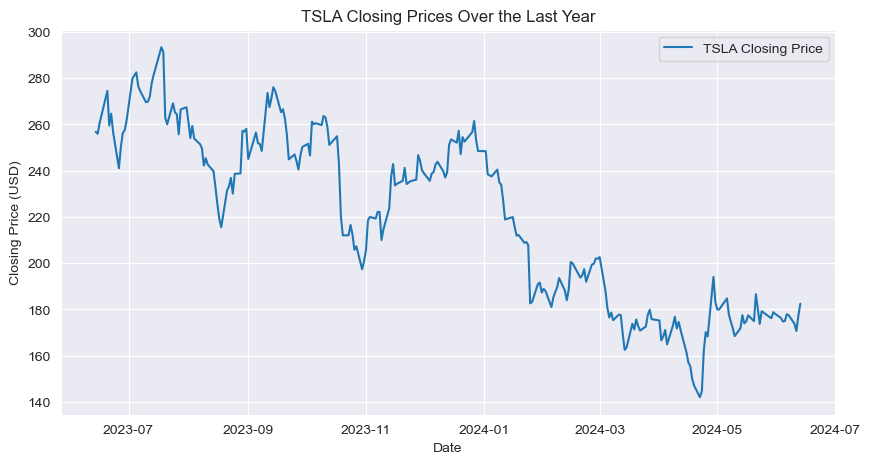

In [87]:
# Define the ticker symbol
ticker_symbol = 'TSLA'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
hist = ticker_data.history(period="1y")

# Plot the closing prices
plt.figure(figsize=(10, 5))
plt.plot(hist.index, hist['Close'], label='TSLA Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('TSLA Closing Prices Over the Last Year')
plt.legend()
plt.show()


## Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.



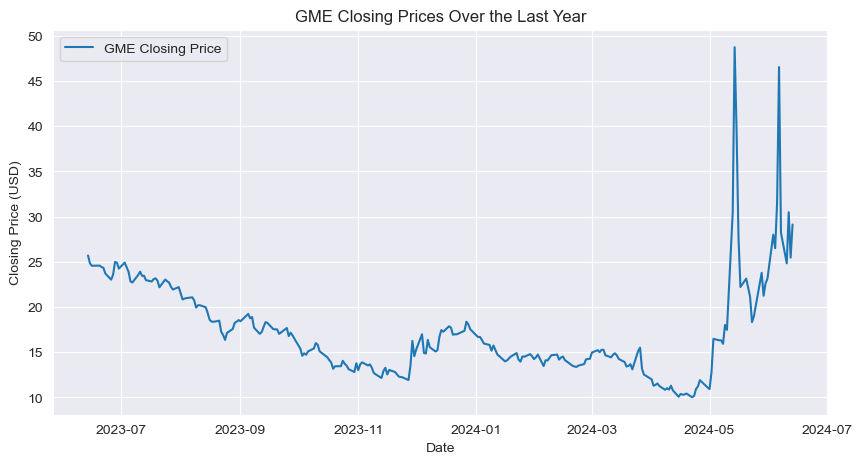

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'GME'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
hist = ticker_data.history(period="1y")

# Plot the closing prices
plt.figure(figsize=(10, 5))
plt.plot(hist.index, hist['Close'], label='GME Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('GME Closing Prices Over the Last Year')
plt.legend()
plt.show()